# Analysis of the synthetic calibration of the equilirium MD1 runs

## 10% parameter variance (corrected verions)

In [2]:
import sys,os
# get utils path (one fodelr up)
curr_dir = os.getcwd()
one_folder_up = os.path.dirname(curr_dir)
sys.path.append(one_folder_up)
import numpy as np
import pandas as pd
import utils as ut
from matplotlib import pyplot as plt
%matplotlib inline

check the spread in the results w.r.t. targets

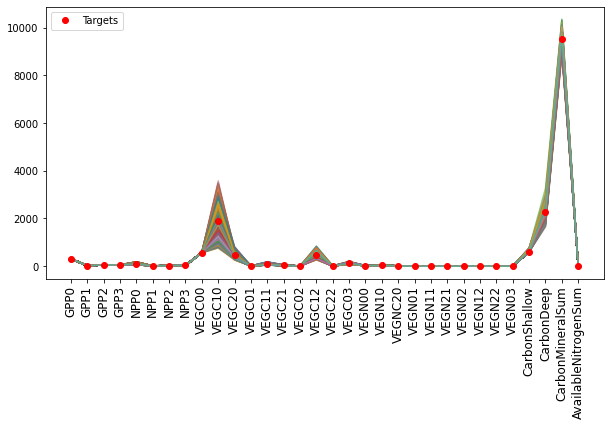

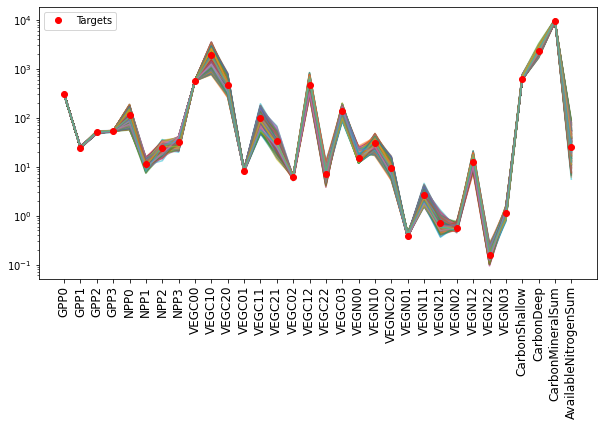

In [3]:
sa_path='20_percent/check_all-run/'
model='results.csv'
params='sample_matrix.csv'
df_model = pd.read_csv(sa_path+model,header=None)
df_param = pd.read_csv(sa_path+params)
#print(df_param.head())


model_header =  ['GPP0','GPP1','GPP2','GPP3',\
                 'NPP0','NPP1','NPP2','NPP3',\
                   'VEGC00','VEGC10','VEGC20',\
                   'VEGC01','VEGC11','VEGC21',\
                   'VEGC02','VEGC12','VEGC22',\
                   'VEGC03',\
                   'VEGN00','VEGN10','VEGNC20',\
                   'VEGN01','VEGN11','VEGN21',\
                   'VEGN02','VEGN12','VEGN22',\
                   'VEGN03','CarbonShallow','CarbonDeep',\
                 'CarbonMineralSum','AvailableNitrogenSum'
                   ]
df_model.columns = model_header
df_model.head()

param_header = ['nmax0','nmax1','nmax2','nmax3',
               'krb00','krb01','krb02','krb03',\
               'krb10','krb11','krb12',\
               'krb20','krb21','krb22',
               'cfall00','cfall01','cfall02','cfall03',\
               'cfall10','cfall11','cfall12',\
               'cfall20','cfall21','cfall22',\
               'nfall00','nfall01','nfall02','nfall03',\
               'nfall10','nfall11','nfall12',\
               'nfall20','nfall21','nfall22',\
               'micbnup','kdcrawc','kdcsoma','kdcsompr','kdcsomcr'
               ]
df_param.columns = param_header

df_model.head()
df_param.head()

ut.spaghetti_match_plot(df_param,df_model)
ut.spaghetti_match_plot(df_param,df_model,logy=True)

# Workflow:
## Above-ground
### (1) cmax -> GPP
### (2) nmax, krb -> NPP, VEGC
### (3) cfall -> NPP, VEGC
### (4) nfall -> NPP, VEGC,VEGN
## Below-ground
### (5) soil param -> NPP, VEGC,VEGN, SoilC

In [59]:
def par_value_minus_mean_box_plot(df_x,x_true):
    ''' plots the spaghetti plot of modeled v.s. observed values 
        df_x: parameter dataframe
        df_y: model output dataframe
        logy: True enables the logplot option
    '''
    xx=df_x.copy()
    xx.loc[len(df_x.index)] = pd.Series(x_true, index=df_x.columns)
    
    fig, ax = plt.subplots(1,2,figsize=(14, 4))
    
    ax[0].boxplot((xx-xx.iloc[-1]).iloc[:-1,:].values, labels=xx.columns);
    ax[0].plot(np.zeros(len(xx.columns)+2),'--',color='black',alpha=0.5)
    ax[0].set_xticks(range(1, len(xx.columns) + 1))
    ax[0].set_xticklabels(xx.columns, rotation=45, fontsize=12)
    ax[0].set_xlim([0,len(xx.columns)+1])
    ax[0].set_ylabel('Modeled-Observed', fontsize=12)
            
    std_devs = np.std((xx-xx.iloc[-1]).iloc[:-1,:], axis=0)
    ax[1].bar(range(1, len(xx.columns) + 1), std_devs, tick_label=xx.columns)
    ax[1].set_xticks(range(1, len(xx.columns) + 1))
    ax[1].set_xticklabels(xx.columns, rotation=45, fontsize=12)
    #ax[1].set_title("Standard Deviation of Parameters' Deviations", fontsize=14)
    #ax[1].set_xlabel('Parameter', fontsize=12)
    ax[1].set_ylabel('Standard Deviation', fontsize=12)

def rmse(x_mean,x_true):
    MSE = np.square(np.subtract(x_mean,x_true)) 
    return np.sqrt(MSE)

In [60]:
path='10_percent/csv/'
model='out-cmax-gpp-md1-r-10-EJ.finalresults.csv'
params='param-cmax-gpp-md1-r-10-EJ.finalresults.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params,header=None)
model_header = ['GPP0','GPP1','GPP2','GPP3']
df_model.columns = model_header

df_param = pd.read_csv(path+params,header=None)
param_header = ['cmax0','cmax1','cmax2','cmax3']
df_param.columns = param_header
df_model

,GPP0,GPP1,GPP2,GPP3
0,307.169857,24.609995,50.009997,52.869992
1,307.169865,24.609995,50.009996,52.869993
2,320.485151,25.182328,50.372545,48.277792
3,307.169876,24.609995,50.009996,52.869993
4,307.170154,24.610009,50.010015,52.870007
5,307.114199,24.602308,51.989896,52.870039
6,307.169854,24.609998,50.010019,52.869991
7,307.169867,24.609992,50.009989,52.869995
8,307.169838,24.609994,50.009996,52.869993
9,307.169876,24.609996,50.009998,52.869993


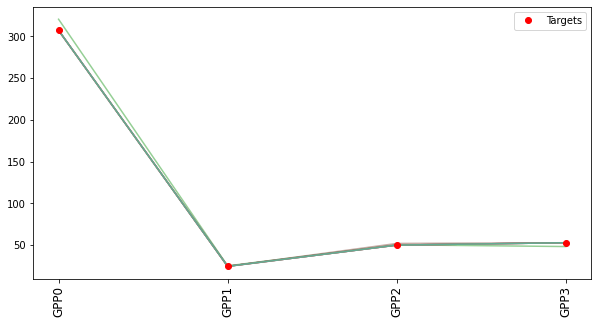

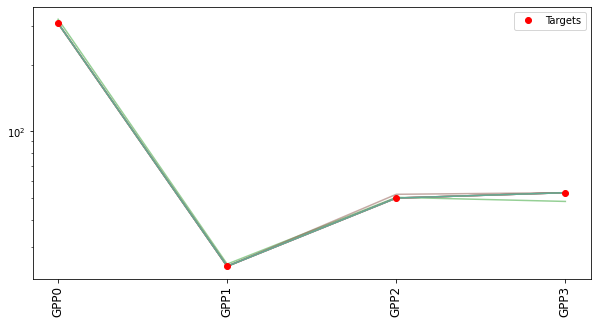

In [6]:
ut.spaghetti_match_plot(df_param,df_model)
ut.spaghetti_match_plot(df_param,df_model,logy=True)

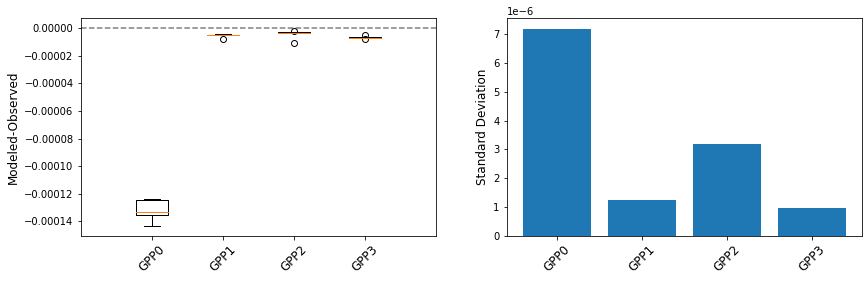

In [62]:
xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param,df_model)
#xparams_MD1
rmetric='r2rmse'
nelem=10
order=True
y_sort=ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:].iloc[:5,:-6].copy()
par_value_minus_mean_box_plot(y_sort,df_model.iloc[-1,:])
rmse_GPP_MD1=rmse(y_sort.mean(),df_model.iloc[-1,:]) 


MSE = np.square(np.subtract(y_sort,df_model.iloc[-1,:])) 

cmax0    0.002813
cmax1    0.007911
cmax2    0.002804
cmax3    0.000924
dtype: float64

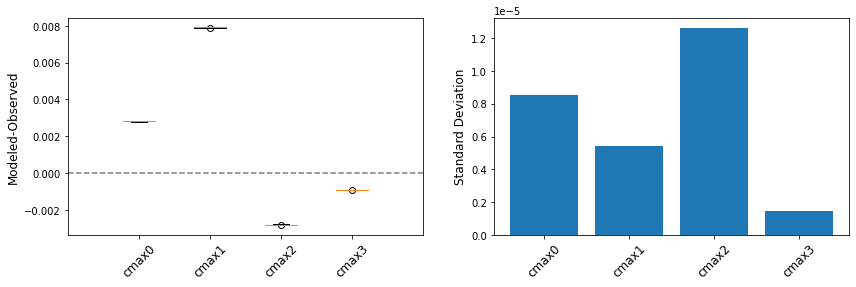

In [64]:
cmax_true_params = [381.19, 113.93, 210.48, 93.31]
x_sort=xparams_MD1.sort_values(by=[rmetric],ascending=order)[:].iloc[:5,:-6].copy()
par_value_minus_mean_box_plot(x_sort,cmax_true_params)
rmse_cmax_MD1=rmse(x_sort.mean(),cmax_true_params)
rmse_cmax_MD1

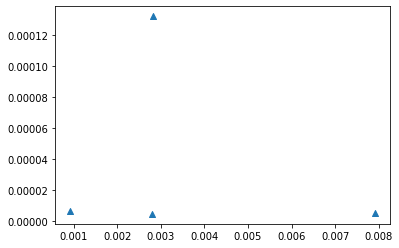

In [24]:
plt.scatter(rmse_cmax_MD1, rmse_GPP_MD1,  marker='^')

array([5.85923552e+01, 1.34833606e-11, 3.20400728e+03, 5.04122594e-09,
       9.71357757e-09, 2.05891385e-09, 1.14262066e-06, 2.15978605e-09,
       7.45751842e-11, 1.90027118e-06])

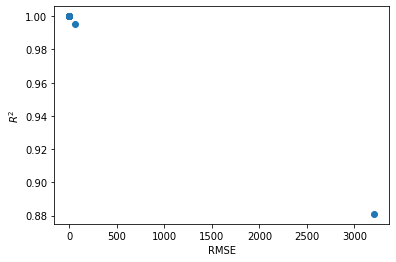

In [6]:
ut.plot_r2_rmse(df_model)

In [7]:
xparams, ymodel = ut.get_params_r2_rmse(df_param,df_model,r2lim=0.97)
xparams

,cmax0,cmax1,cmax2,cmax3,$R^2$,RMSE,MAPE,COMBINED_ACC
0,379.718137,110.838629,263.973156,82.916498,0.995503,5.859236e+01,8.753094e-02,0.948402
1,381.192983,113.937936,210.477194,93.309090,1.000000,1.348336e-11,4.684325e-08,1.000000
3,381.193177,113.937958,210.477186,93.309088,1.000000,5.041226e-09,2.157501e-07,1.000000
4,381.192880,113.938363,210.477789,93.309148,1.000000,9.713578e-09,1.917451e-06,0.999999
5,381.192880,113.938005,210.477352,93.309100,1.000000,2.058914e-09,4.272302e-07,1.000000
6,381.187283,113.938274,210.472294,93.308557,1.000000,1.142621e-06,9.878758e-06,0.999996
7,381.192901,113.938041,210.477371,93.309101,1.000000,2.159786e-09,5.094758e-07,1.000000
8,381.192995,113.937980,210.477276,93.309086,1.000000,7.457518e-11,1.681360e-07,1.000000
9,381.189630,113.937371,210.476348,93.309047,1.000000,1.900271e-06,4.525559e-06,0.999998


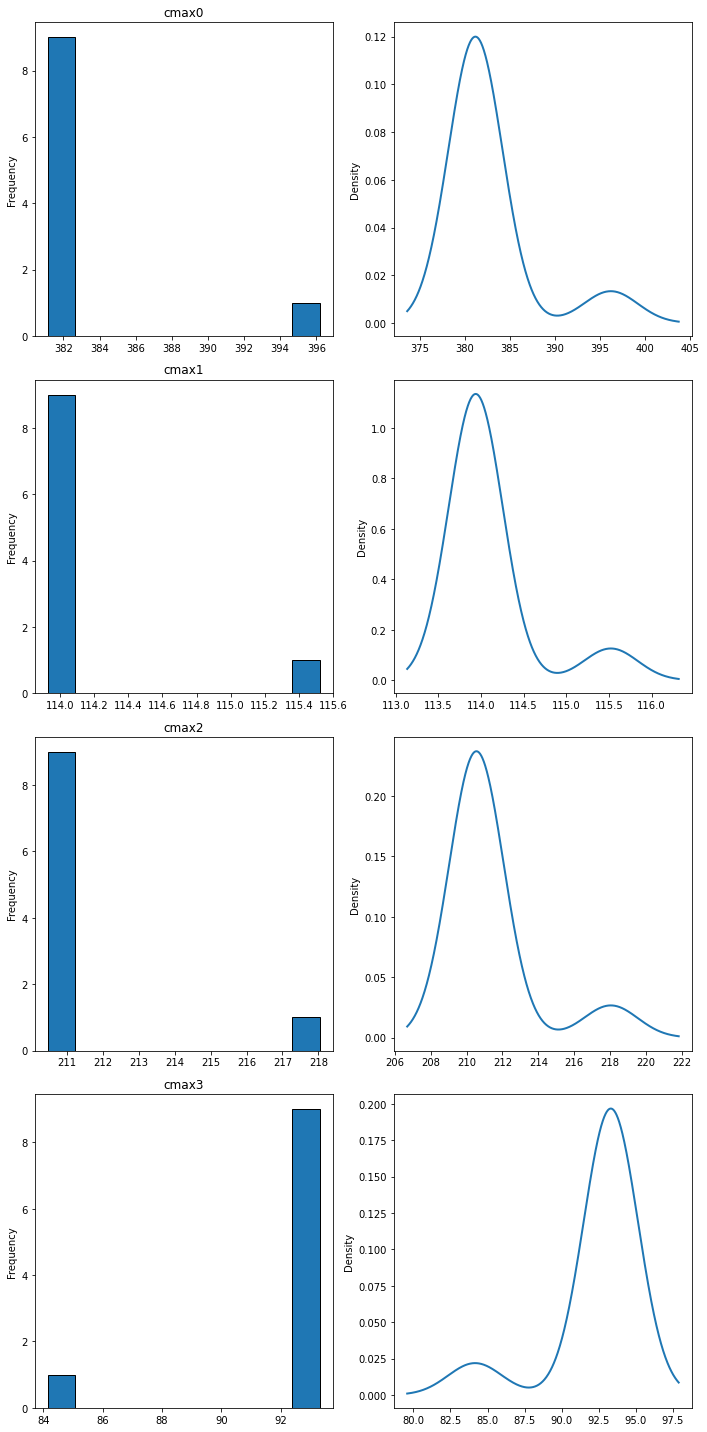

In [16]:
xparams, ymodel = ut.get_params(df_param,df_model,r2lim=0.9)
# if throws a 'is_first_col' error, do 'pip install --upgrade matplotlib'
ut.plot_hist_dist(xparams)

In [9]:
def z_score(y_short,y_long):
    '''
    NOTE: this function assumes that last row in y_long is target
    
    y_short: model dataframe restricted by R2
    y_long : full model dataframe 
    '''
    zscore=[]
    print('mean-obs','std')
    for iname in y_long.columns:
        zscore.append((y_short[iname].mean()-y_long[iname].iloc[-1])/y_short[iname].std())
        print (y_short[iname].mean()-y_long[iname].iloc[-1],y_short[iname].std())
    df_z = pd.DataFrame(zscore)
    df_z.index = y_long.columns
    
    return df_z

xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param,df_model)
xparams_MD1
rmetric='r2rmse'
nelem=10
order=True
z_score(ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:nelem],df_model)

mean-obs std
10.353518691062845 32.80641264873097
1.6312365275621445 5.314669125014228
1.2398698180913996 4.671998200141723
-4.724426740407942 13.234026078213727


,0
GPP0,0.315594
GPP1,0.306931
GPP2,0.265383
GPP3,-0.356991


In [10]:
nelem=5
order=True
z_score(ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:nelem],df_model)

mean-obs std
-3.2567978109909745e-06 9.154018302086402e-05
9.600520137098556e-06 9.193731675755287e-06
1.249313354634296e-05 2.296442278370029e-05
3.0517578082367436e-06 4.612965158458965e-06


,0
GPP0,-0.035578
GPP1,1.044246
GPP2,0.544021
GPP3,0.661561


In [11]:
cmax_true_params = [381.19, 113.93, 210.48, 93.31]
xparams_MD1.sort_values(by=[rmetric],ascending=order)[:10]

,cmax0,cmax1,cmax2,cmax3,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
1,381.192983,113.937936,210.477194,93.309090,1.000000,1.348336e-11,4.684325e-08,1.000000,4.325277e-15,4.062700e-08
8,381.192995,113.937980,210.477276,93.309086,1.000000,7.457518e-11,1.681360e-07,1.000000,2.395440e-14,1.458238e-07
5,381.192880,113.938005,210.477352,93.309100,1.000000,2.058914e-09,4.272302e-07,1.000000,6.611102e-13,3.705353e-07
7,381.192901,113.938041,210.477371,93.309101,1.000000,2.159786e-09,5.094758e-07,1.000000,6.935119e-13,4.418667e-07
3,381.193177,113.937958,210.477186,93.309088,1.000000,5.041226e-09,2.157501e-07,1.000000,1.618709e-12,1.871193e-07
4,381.192880,113.938363,210.477789,93.309148,1.000000,9.713578e-09,1.917451e-06,0.999999,3.118991e-12,1.662999e-06
6,381.187283,113.938274,210.472294,93.308557,1.000000,1.142621e-06,9.878758e-06,0.999996,3.668921e-10,8.567814e-06
9,381.189630,113.937371,210.476348,93.309047,1.000000,1.900271e-06,4.525559e-06,0.999998,6.101717e-10,3.925002e-06
0,379.718137,110.838629,263.973156,82.916498,0.995503,5.859236e+01,8.753094e-02,0.948402,1.883191e-02,7.821619e-02
2,491.029338,171.855249,201.709979,18.714985,0.880980,3.204007e+03,1.153008e+00,-0.119020,1.007058e+00,1.419213e+00


In [12]:
df_model.iloc[-1]

GPP0    307.17
GPP1     24.61
GPP2     50.01
GPP3     52.87
Name: 10, dtype: float64

In [13]:
ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:10]

,GPP0,GPP1,GPP2,GPP3,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
1,307.170002,24.609999,50.009993,52.870001,1.000000,1.348336e-11,4.684325e-08,1.000000,4.325277e-15,4.062700e-08
8,307.170006,24.610009,50.010014,52.869999,1.000000,7.457518e-11,1.681360e-07,1.000000,2.395440e-14,1.458238e-07
5,307.169918,24.610015,50.010034,52.870008,1.000000,2.058914e-09,4.272302e-07,1.000000,6.611102e-13,3.705353e-07
7,307.169917,24.610022,50.010036,52.870008,1.000000,2.159786e-09,5.094758e-07,1.000000,6.935119e-13,4.418667e-07
3,307.170141,24.610003,50.009986,52.869999,1.000000,5.041226e-09,2.157501e-07,1.000000,1.618709e-12,1.871193e-07
4,307.169911,24.610095,50.010144,52.870034,1.000000,9.713578e-09,1.917451e-06,0.999999,3.118991e-12,1.662999e-06
6,307.168145,24.610198,50.008995,52.869718,1.000000,1.142621e-06,9.878758e-06,0.999996,3.668921e-10,8.567814e-06
9,307.167253,24.609882,50.009801,52.869980,1.000000,1.900271e-06,4.525559e-06,0.999998,6.101717e-10,3.925002e-06
0,306.987830,24.170209,64.424002,47.733915,0.995503,5.859236e+01,8.753094e-02,0.948402,1.883191e-02,7.821619e-02
2,410.892065,41.361934,47.995694,10.762071,0.880980,3.204007e+03,1.153008e+00,-0.119020,1.007058e+00,1.419213e+00


In [14]:
xparams_MD1.sort_values(by=[rmetric],ascending=order)[:10]

,cmax0,cmax1,cmax2,cmax3,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
1,381.192983,113.937936,210.477194,93.309090,1.000000,1.348336e-11,4.684325e-08,1.000000,4.325277e-15,4.062700e-08
8,381.192995,113.937980,210.477276,93.309086,1.000000,7.457518e-11,1.681360e-07,1.000000,2.395440e-14,1.458238e-07
5,381.192880,113.938005,210.477352,93.309100,1.000000,2.058914e-09,4.272302e-07,1.000000,6.611102e-13,3.705353e-07
7,381.192901,113.938041,210.477371,93.309101,1.000000,2.159786e-09,5.094758e-07,1.000000,6.935119e-13,4.418667e-07
3,381.193177,113.937958,210.477186,93.309088,1.000000,5.041226e-09,2.157501e-07,1.000000,1.618709e-12,1.871193e-07
4,381.192880,113.938363,210.477789,93.309148,1.000000,9.713578e-09,1.917451e-06,0.999999,3.118991e-12,1.662999e-06
6,381.187283,113.938274,210.472294,93.308557,1.000000,1.142621e-06,9.878758e-06,0.999996,3.668921e-10,8.567814e-06
9,381.189630,113.937371,210.476348,93.309047,1.000000,1.900271e-06,4.525559e-06,0.999998,6.101717e-10,3.925002e-06
0,379.718137,110.838629,263.973156,82.916498,0.995503,5.859236e+01,8.753094e-02,0.948402,1.883191e-02,7.821619e-02
2,491.029338,171.855249,201.709979,18.714985,0.880980,3.204007e+03,1.153008e+00,-0.119020,1.007058e+00,1.419213e+00


## (2) nmax, krb -> NPP, VEGC

In [25]:
model='out-nmax-krb-npp-vegc-md1-r-10-EJ.finalresults.csv'
params='param-nmax-krb-npp-vegc-md1-r-10-EJ.finalresults.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params,header=None)
model_header =  ['NPP0','NPP1','NPP2','NPP3',\
                   'VEGC00','VEGC10','VEGC20',\
                   'VEGC01','VEGC11','VEGC21',\
                   'VEGC02','VEGC12','VEGC22',\
                   'VEGC03'
                   ]
df_model.columns = model_header

df_param = pd.read_csv(path+params,header=None)
param_header = ['nmax0','nmax1','nmax2','nmax3',
               'krb00','krb01','krb02','krb03',\
               'krb10','krb11','krb12',\
               'krb20','krb21','krb22']
df_param.columns = param_header
df_model.head()

,NPP0,NPP1,NPP2,NPP3,VEGC00,VEGC10,VEGC20,VEGC01,VEGC11,VEGC21,VEGC02,VEGC12,VEGC22,VEGC03
0,113.185170,11.317167,24.093393,32.416755,572.548688,1893.976111,475.622531,8.386758,98.868039,33.170635,6.152585,477.669397,7.229047,136.542186
1,112.720230,11.285911,23.871816,32.426060,572.105225,1895.412378,464.994699,8.350025,98.750194,32.868543,6.059060,478.262985,6.590735,136.559103
2,113.085300,11.302241,23.791130,32.401104,571.614319,1894.032410,474.556335,8.330139,98.882841,33.227050,6.031205,477.787601,6.845116,136.494287
3,113.696837,11.175061,23.963055,32.465151,573.832428,1896.800830,474.226904,8.394614,97.233316,29.332435,6.167541,473.870212,6.745508,136.714198
4,113.371657,11.330879,23.900079,32.395841,572.671478,1893.990991,474.453546,8.400044,98.896507,33.125931,6.056636,477.786691,6.671807,136.438727


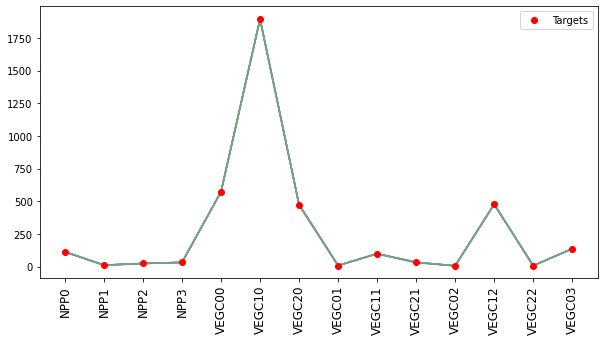

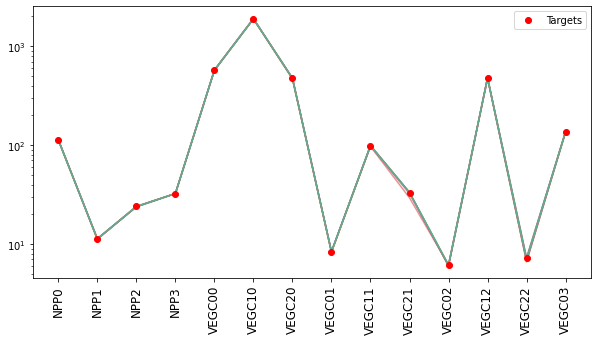

In [26]:
ut.spaghetti_match_plot(df_param,df_model)
ut.spaghetti_match_plot(df_param,df_model,logy=True)

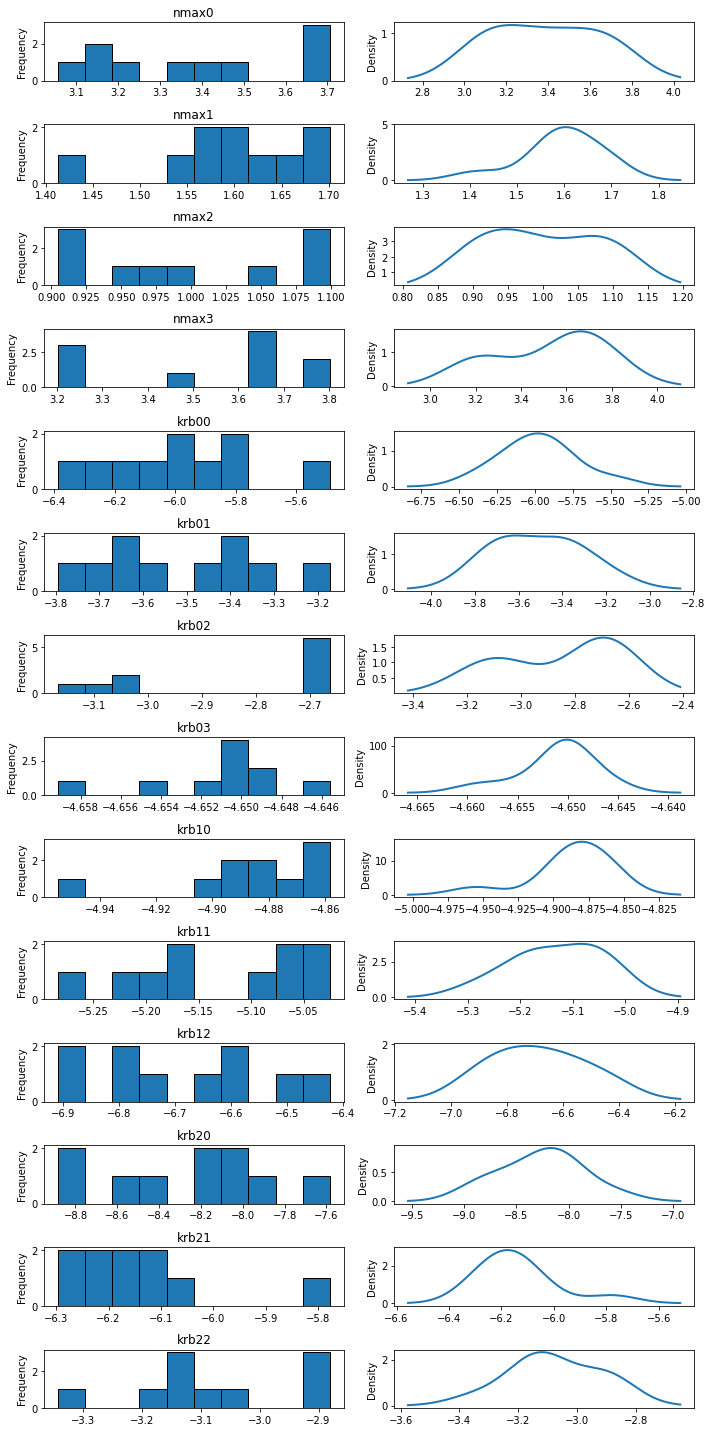

In [113]:
xparams, ymodel = ut.get_params(df_param,df_model,r2lim=0.9)
# if throws a 'is_first_col' error, do 'pip install --upgrade matplotlib'
ut.plot_hist_dist(xparams)

In [120]:
y_sort[:5]

,NPP0,NPP1,NPP2,NPP3,VEGC00,VEGC10,VEGC20,VEGC01,VEGC11,VEGC21,VEGC02,VEGC12,VEGC22,VEGC03
8,113.077266,11.264044,23.992024,32.418066,572.249951,1894.030945,474.527539,8.266168,98.908071,33.186670,6.195173,477.785867,7.007761,136.551773
9,112.763627,11.315124,23.863022,32.434669,572.148450,1894.199207,474.516403,8.420269,98.903040,33.190616,6.183260,477.896252,6.982228,136.629987
4,113.371657,11.330879,23.900079,32.395841,572.671478,1893.990991,474.453546,8.400044,98.896507,33.125931,6.056636,477.786691,6.671807,136.438727
7,113.217075,11.299351,23.870674,32.421597,571.745056,1894.045972,474.386612,8.297236,98.852514,33.408298,6.044737,477.797424,7.065342,136.573212
2,113.085300,11.302241,23.791130,32.401104,571.614319,1894.032410,474.556335,8.330139,98.882841,33.227050,6.031205,477.787601,6.845116,136.494287


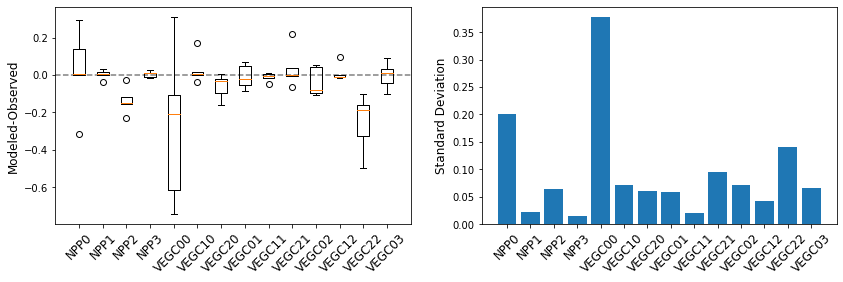

In [27]:
xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param,df_model)
rmetric='r2rmse'
nelem=10
order=True
y_sort=ymodel_MD1.sort_values(by=[rmetric],ascending=order).iloc[:5,:-6].copy()
par_value_minus_mean_box_plot(y_sort[:5],df_model.iloc[-1,:])
MSE = np.square(np.subtract(y_sort.mean(),df_model.iloc[-1,:])) 
rmse_nmax_krb_VEGC_MD1=np.sqrt(MSE)

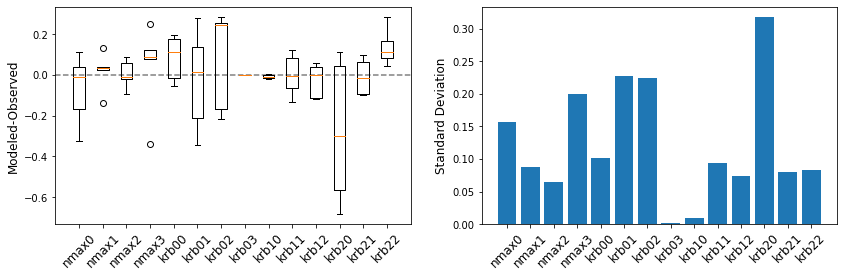

In [28]:
nmax_krb_true_params = [3.38, 1.55, 1.00, 3.55, \
                    -6.0, -3.45, -2.95, -4.65, -4.88, -5.15, -6.65, -8.2, -6.2, -3.2]
x_sort=xparams_MD1.sort_values(by=[rmetric],ascending=order)[:].iloc[:5,:-6].copy()
par_value_minus_mean_box_plot(x_sort,nmax_krb_true_params)
MSE = np.square(np.subtract(x_sort.mean(),nmax_krb_true_params)) 
rmse_nmax_krb_MD1=np.sqrt(MSE)

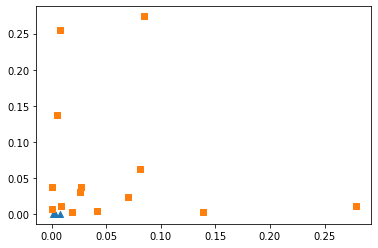

In [29]:
plt.scatter(rmse_cmax_MD1, rmse_GPP_MD1,  marker='^')
plt.scatter(rmse_nmax_krb_MD1, rmse_nmax_krb_VEGC_MD1,  marker='s')

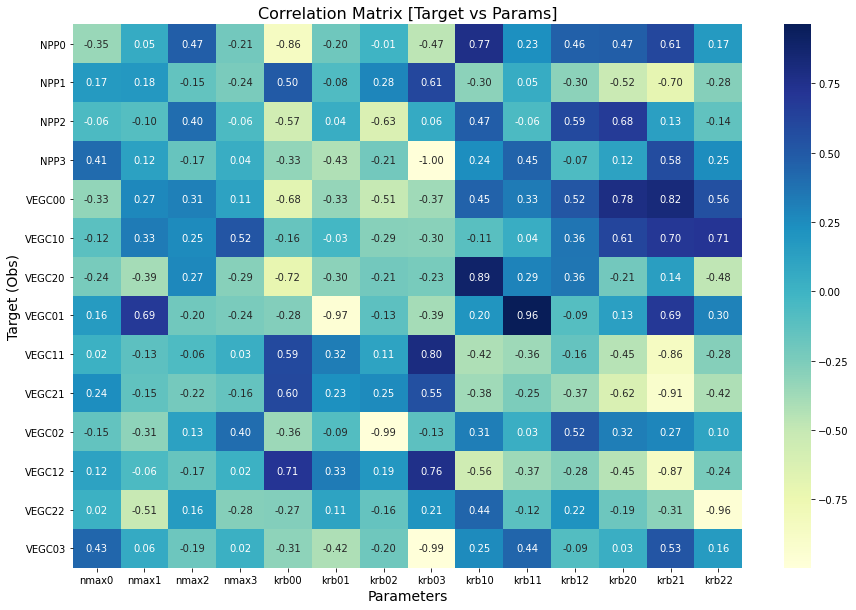

In [80]:
corr_mp=ut.get_output_param_corr(df_param,df_model)

## (3) cfall -> NPP, VEGC
looks like `krb` does better than `cfall`

In [30]:
model='out-cfall-vegc-md1-r-10-EJ.finalresults.csv'
params='param-cfall-vegc-md1-r-10-EJ.finalresults.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params,header=None)
model_header =  ['NPP0','NPP1','NPP2','NPP3',\
                   'VEGC00','VEGC10','VEGC20',\
                   'VEGC01','VEGC11','VEGC21',\
                   'VEGC02','VEGC12','VEGC22',\
                   'VEGC03'
                   ]
df_model.columns = model_header

df_param = pd.read_csv(path+params,header=None)
param_header = [
               'cfall00','cfall01','cfall02','cfall03',\
               'cfall10','cfall11','cfall12',\
               'cfall20','cfall21','cfall22']
df_param.columns = param_header
df_model.head()

,NPP0,NPP1,NPP2,NPP3,VEGC00,VEGC10,VEGC20,VEGC01,VEGC11,VEGC21,VEGC02,VEGC12,VEGC22,VEGC03
0,113.086731,11.391176,24.095668,32.402239,572.199622,1894.051453,474.618152,8.595025,97.820844,32.416968,6.135076,477.842105,6.752792,136.714398
1,112.914775,11.383764,23.956208,32.419943,572.226544,1894.051563,474.559634,8.585933,97.527222,33.355536,6.053682,477.925485,7.274185,136.482164
2,113.185051,11.438407,24.319059,32.416377,572.734729,1893.840540,475.056232,8.591700,96.759822,33.500996,6.080494,477.599185,7.449006,136.549266
3,112.809630,11.405156,23.651593,32.373463,571.715936,1894.281006,474.531482,8.506640,96.915101,33.783149,6.104742,478.011963,6.563273,136.920815
4,113.069626,11.399025,23.752366,32.424289,572.179907,1893.998901,474.610120,8.540591,97.284006,33.493554,6.150225,477.719186,7.257950,136.496564


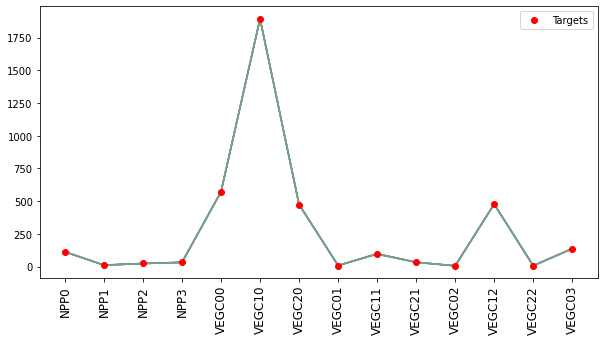

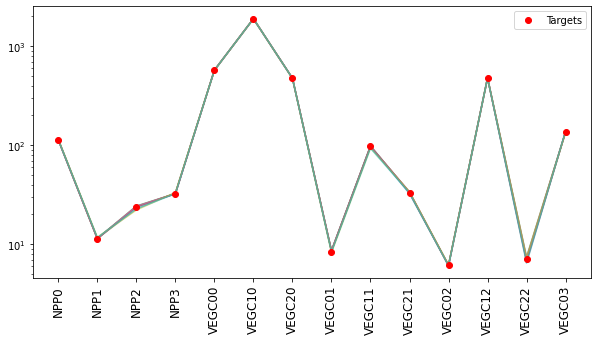

In [82]:
ut.spaghetti_match_plot(df_param,df_model)
ut.spaghetti_match_plot(df_param,df_model,logy=True)

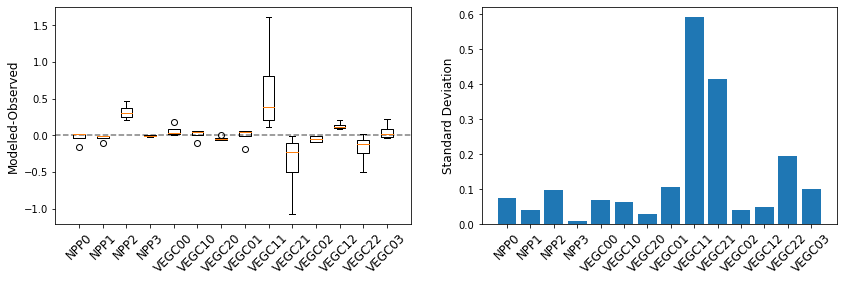

In [31]:
xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param,df_model)
rmetric='r2rmse'
nelem=10
order=True
y_sort=ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:].iloc[:5,:-6].copy()
par_value_minus_mean_box_plot(y_sort,df_model.iloc[-1,:])
MSE = np.square(np.subtract(y_sort.mean(),df_model.iloc[-1,:])) 
rmse_cfall_VEGC_MD1=np.sqrt(MSE)

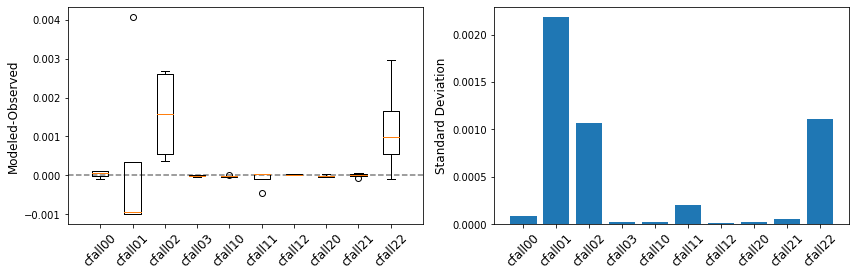

In [32]:
cfall_true_params = [0.001107,0.050722, 0.024987, 0.019928, 0.003407, 0.004790, 
                     0.003590, 0.005149, 0.001171, 0.026025]
x_sort=xparams_MD1.sort_values(by=[rmetric],ascending=order)[:].iloc[:5,:-6].copy()
par_value_minus_mean_box_plot(x_sort,cfall_true_params)
MSE = np.square(np.subtract(x_sort.mean(),cfall_true_params)) 
rmse_cfall_MD1=np.sqrt(MSE)

In [37]:
rmse_cfall_VEGC_MD1[4:]

VEGC00    0.140039
VEGC10    0.048262
VEGC20    0.035829
VEGC01    0.233994
VEGC11    1.310169
VEGC21    0.015532
VEGC02    0.030760
VEGC12    0.007177
VEGC22    0.119115
VEGC03    0.001337
dtype: float64

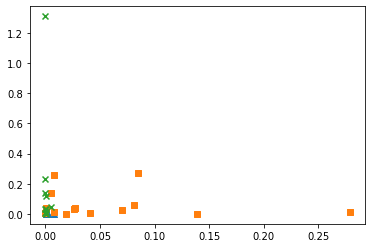

In [38]:
plt.scatter(rmse_cmax_MD1, rmse_GPP_MD1,  marker='^')
plt.scatter(rmse_nmax_krb_MD1, rmse_nmax_krb_VEGC_MD1,  marker='s')
plt.scatter(rmse_cfall_MD1, rmse_cfall_VEGC_MD1[4:],  marker='x')

## (4) nfall -> NPP, VEGC, VEGN 

In [93]:
model='out-nfall-npp-vegc-vegn-md1-r-10-EJ.finalresults.csv'
params='param-nfall-npp-vegc-vegn-md1-r-10-EJ.finalresults.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params,header=None)
model_header =  ['NPP0','NPP1','NPP2','NPP3',\
                   'VEGC00','VEGC10','VEGC20',\
                   'VEGC01','VEGC11','VEGC21',\
                   'VEGC02','VEGC12','VEGC22',\
                   'VEGC03',\
                   'VEGN00','VEGN10','VEGN20',\
                   'VEGN01','VEGN11','VEGN21',\
                   'VEGN02','VEGN12','VEGN22',\
                   'VEGN03'
                   ]
df_model.columns = model_header

df_param = pd.read_csv(path+params,header=None)
param_header = [
               'nfall00','nfall01','nfall02','nfall03',\
               'nfall10','nfall11','nfall12',\
               'nfall20','nfall21','nfall22']
df_param.columns = param_header
df_model.head()

,NPP0,NPP1,NPP2,NPP3,VEGC00,VEGC10,VEGC20,VEGC01,VEGC11,VEGC21,...,VEGN00,VEGN10,VEGN20,VEGN01,VEGN11,VEGN21,VEGN02,VEGN12,VEGN22,VEGN03
0,113.100263,11.299191,23.978043,32.415635,572.206030,1894.381750,474.629175,8.342158,98.924005,33.185664,...,14.786937,30.267716,9.511708,0.384926,2.602237,0.715568,0.572625,12.549231,0.156080,1.148669
1,113.127009,11.300155,24.130846,32.415124,572.335101,1894.086414,474.572711,8.343564,98.888007,33.184688,...,14.789797,30.262240,9.510556,0.384995,2.601235,0.715670,0.572629,12.527693,0.156948,1.148614
2,113.119343,11.300380,24.081500,32.415670,572.266742,1894.162671,474.583990,8.344034,98.910419,33.191693,...,14.788198,30.263851,9.510790,0.385015,2.601864,0.715806,0.572586,12.528652,0.156622,1.148635
3,113.116671,11.299449,24.136683,32.415033,572.337463,1894.061548,474.556500,8.343978,98.885623,33.185352,...,14.789732,30.262695,9.510245,0.385013,2.601244,0.715672,0.572819,12.527002,0.157039,1.148612
4,113.108997,11.299228,23.977957,32.414917,572.333820,1894.008398,474.542993,8.343821,98.881757,33.184767,...,14.789728,30.261968,9.509969,0.385007,2.601150,0.715665,0.572859,12.528912,0.156164,1.148609


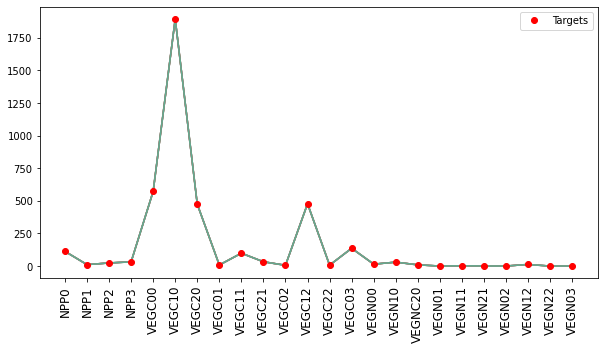

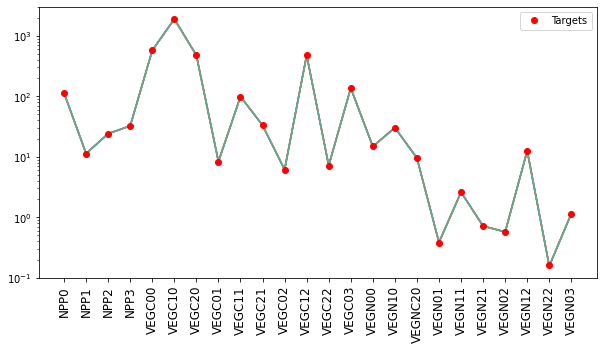

In [87]:
ut.spaghetti_match_plot(df_param,df_model)
ut.spaghetti_match_plot(df_param,df_model,logy=True)

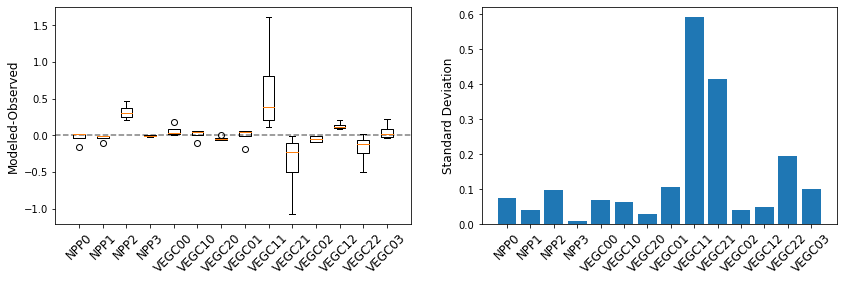

In [42]:
xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param,df_model)
rmetric='r2rmse'
nelem=10
order=True
y_sort=ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:].iloc[:5,:-6].copy()
par_value_minus_mean_box_plot(y_sort,df_model.iloc[-1,:])
MSE = np.square(np.subtract(y_sort.mean(),df_model.iloc[-1,:])) 
rmse_nfall_VEGC_MD1=np.sqrt(MSE)

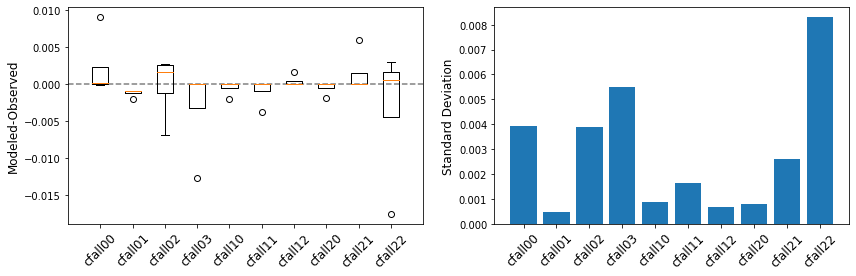

In [40]:
nfall_true_params = [0.010242, 0.044555, 0.017748, 0.007250, 0.001343, 0.001424, 
                     0.005220, 0.003280, 0.007283, 0.007607]
x_sort=xparams_MD1.sort_values(by=[rmetric],ascending=order)[:].iloc[:5,:-6].copy()
par_value_minus_mean_box_plot(x_sort,nfall_true_params)
MSE = np.square(np.subtract(x_sort.mean(),nfall_true_params)) 
rmse_nfall_MD1=np.sqrt(MSE)

Text(0, 0.5, 'RMSE targets')

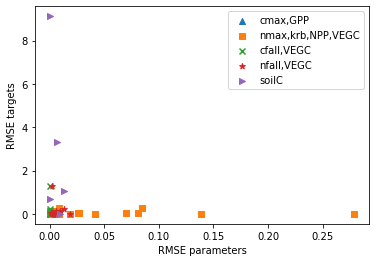

In [56]:
plt.scatter(rmse_cmax_MD1, rmse_GPP_MD1,  marker='^')
plt.scatter(rmse_nmax_krb_MD1, rmse_nmax_krb_VEGC_MD1,  marker='s')
plt.scatter(rmse_cfall_MD1, rmse_cfall_VEGC_MD1[4:],  marker='x')
plt.scatter(rmse_nfall_MD1, rmse_nfall_VEGC_MD1[4:],  marker='*')
plt.scatter(rmse_soilp_MD1, rmse_soilt_MD1[-5:],  marker='>')
plt.legend(['cmax,GPP','nmax,krb,NPP,VEGC','cfall,VEGC','nfall,VEGC','soilC'])
plt.xlabel('RMSE parameters')
plt.ylabel('RMSE targets')

VEGN03                  0.003728
CarbonShallow           1.055103
CarbonDeep              3.341048
CarbonMineralSum        9.122690
AvailableNitrogenSum    0.684222
dtype: float64

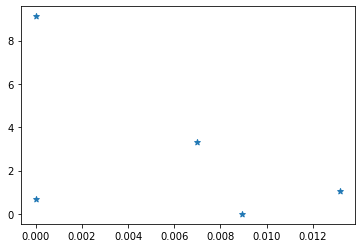

In [54]:
plt.scatter(rmse_soilp_MD1, rmse_soilt_MD1[-5:],  marker='*')
rmse_soilt_MD1[-5:]

## (5) soil param -> NPP, VEGC,VEGN, SoilC

In [48]:
model='out-test_csoil_consil.csv'
params='param-test_csoil_consil.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params,header=None)
model_header =  ['NPP0','NPP1','NPP2','NPP3',\
                   'VEGC00','VEGC10','VEGC20',\
                   'VEGC01','VEGC11','VEGC21',\
                   'VEGC02','VEGC12','VEGC22',\
                   'VEGC03',\
                   'VEGN00','VEGN10','VEGN20',\
                   'VEGN01','VEGN11','VEGN21',\
                   'VEGN02','VEGN12','VEGN22',\
                   'VEGN03',   
                   'CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum']
                
df_model.columns = model_header

df_param = pd.read_csv(path+params,header=None)
param_header = [ 'micbnup', 'kdcrawc', 'kdcsoma', 'kdcsompr', 'kdcsomcr']
               
df_param.columns = param_header
df_model.head()

,NPP0,NPP1,NPP2,NPP3,VEGC00,VEGC10,VEGC20,VEGC01,VEGC11,VEGC21,...,VEGN11,VEGN21,VEGN02,VEGN12,VEGN22,VEGN03,CarbonShallow,CarbonDeep,CarbonMineralSum,AvailableNitrogenSum
0,99.994654,5.415605,3.234050,32.304700,573.121295,1637.684009,413.295001,6.545572,23.942267,9.386453,...,0.629233,0.238133,0.316692,1.224388,0.015916,1.144005,609.091880,1155.148098,4954.024445,18.390315
1,93.790288,4.599707,2.928094,32.298831,572.326807,1531.022705,386.831842,6.281237,13.570899,6.032830,...,0.360338,0.161647,0.303120,1.076594,0.013955,1.143763,601.949465,1105.093850,4636.213997,17.915327
2,92.917780,4.555264,2.880936,32.298514,571.778687,1526.765161,385.537170,6.242355,14.375748,8.401666,...,0.388642,0.230897,0.299842,1.074596,0.013730,1.143719,604.224898,1140.245110,4661.851938,15.072594
3,99.032973,5.284061,3.172370,32.300738,573.400378,1631.315198,411.603867,6.506665,23.104436,8.903706,...,0.608914,0.224209,0.314338,1.213790,0.015626,1.143856,609.730968,1149.266386,4945.876169,18.119001
4,92.898787,4.551448,2.878900,32.297873,571.914557,1526.675208,385.498978,6.240768,14.342909,8.418886,...,0.388003,0.231355,0.299735,1.073764,0.013717,1.143695,604.254010,1140.241776,4662.425524,15.301327


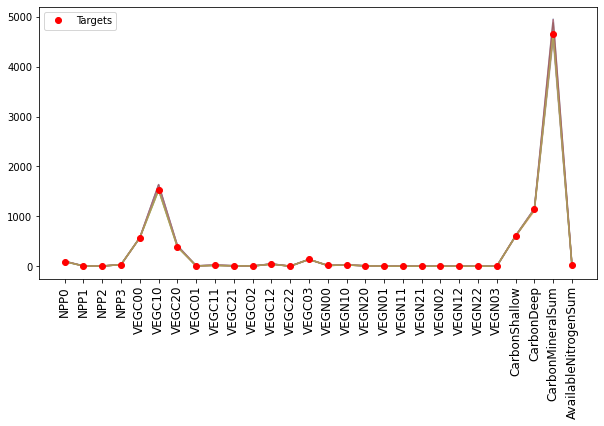

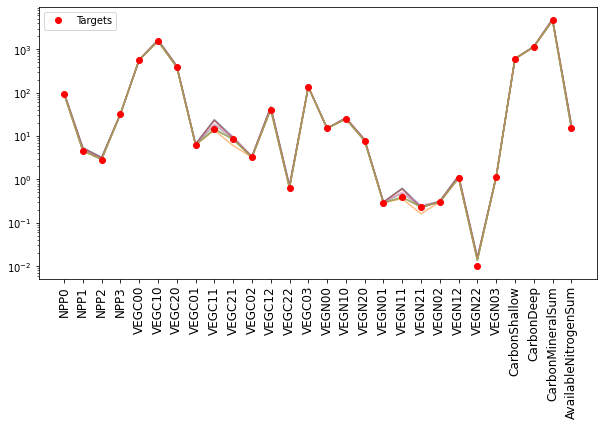

In [106]:
ut.spaghetti_match_plot(df_param,df_model)
ut.spaghetti_match_plot(df_param,df_model,logy=True)

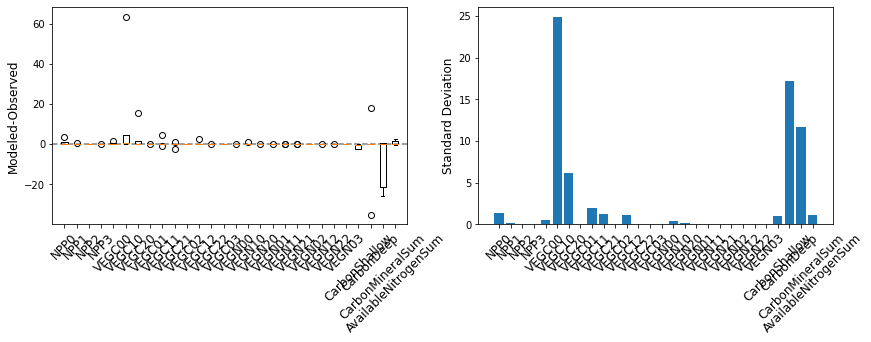

In [49]:
xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param,df_model)
rmetric='r2rmse'
nelem=10
order=True
y_sort=ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:].iloc[:5,:-6].copy()
par_value_minus_mean_box_plot(y_sort,df_model.iloc[-1,:])
MSE = np.square(np.subtract(y_sort.mean(),df_model.iloc[-1,:])) 
rmse_soilt_MD1=np.sqrt(MSE)

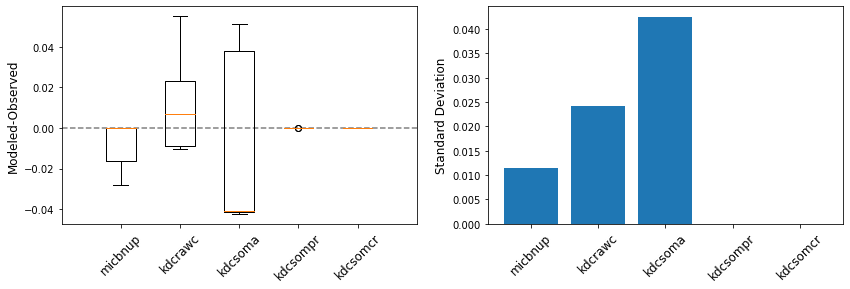

In [50]:
true_params=[0.4495,   # micbnup: parameter for soil microbial immobialization of N  .64 
             0.634,    # kdcrawc: raw-material (litter) C decompositin rates at reference condition   .654
             0.54,     # kdcsoma:   0.58
             0.002,    # kdcsompr:   
             0.00007]  # kdcsomcr:
x_sort=xparams_MD1.sort_values(by=[rmetric],ascending=order)[:].iloc[:5,:-6].copy()
par_value_minus_mean_box_plot(x_sort,true_params)
MSE = np.square(np.subtract(x_sort.mean(),true_params)) 
rmse_soilp_MD1=np.sqrt(MSE)

In [110]:
ymodel_MD1.sort_values(by=[rmetric],ascending=order)

,NPP0,NPP1,NPP2,NPP3,VEGC00,VEGC10,VEGC20,VEGC01,VEGC11,VEGC21,...,CarbonShallow,CarbonDeep,CarbonMineralSum,AvailableNitrogenSum,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
8,92.809409,4.543260,2.874693,32.298627,571.720593,1526.170947,385.354840,6.236446,14.298583,8.428504,...,604.345197,1140.140227,4662.195715,15.466074,1.000000,0.007133,0.011206,1.000000,0.000002,0.114877
2,92.917780,4.555264,2.880936,32.298514,571.778687,1526.765161,385.537170,6.242355,14.375748,8.401666,...,604.224898,1140.245110,4661.851938,15.072594,1.000000,0.017411,0.012254,0.993933,0.000005,0.125615
4,92.898787,4.551448,2.878900,32.297873,571.914557,1526.675208,385.498978,6.240768,14.342909,8.418886,...,604.254010,1140.241776,4662.425524,15.301327,1.000000,0.024010,0.011583,0.997816,0.000007,0.118739
1,93.790288,4.599707,2.928094,32.298831,572.326807,1531.022705,386.831842,6.281237,13.570899,6.032830,...,601.949465,1105.093850,4636.213997,17.915327,0.999916,68.655681,0.054706,0.738304,0.019414,0.561150
6,96.309777,4.876481,2.996701,32.296493,573.226190,1589.640369,401.127048,6.384681,18.919301,9.720934,...,602.300916,1157.923796,4640.699376,16.865789,0.999781,181.290345,0.061129,0.685052,0.051263,0.628745
7,96.036286,4.834704,2.993985,32.301476,572.056708,1581.983679,399.238889,6.351835,17.734372,8.636015,...,601.448603,1144.304927,4542.768456,16.668738,0.999213,625.615958,0.046825,0.704497,0.176903,0.511579
5,98.734158,5.245070,3.146958,32.300147,573.355585,1630.033118,411.152448,6.502688,22.896566,8.862772,...,608.863794,1147.364813,4879.378265,17.939322,0.997672,2106.633175,0.085833,0.267674,0.595684,1.062576
3,99.032973,5.284061,3.172370,32.300738,573.400378,1631.315198,411.603867,6.506665,23.104436,8.903706,...,609.730968,1149.266386,4945.876169,18.119001,0.996428,3310.197627,0.088673,0.079822,0.936010,1.304771
0,99.994654,5.415605,3.234050,32.304700,573.121295,1637.684009,413.295001,6.545572,23.942267,9.386453,...,609.091880,1155.148098,4954.024445,18.390315,0.996198,3536.522030,0.097548,-0.003802,1.000007,1.414219


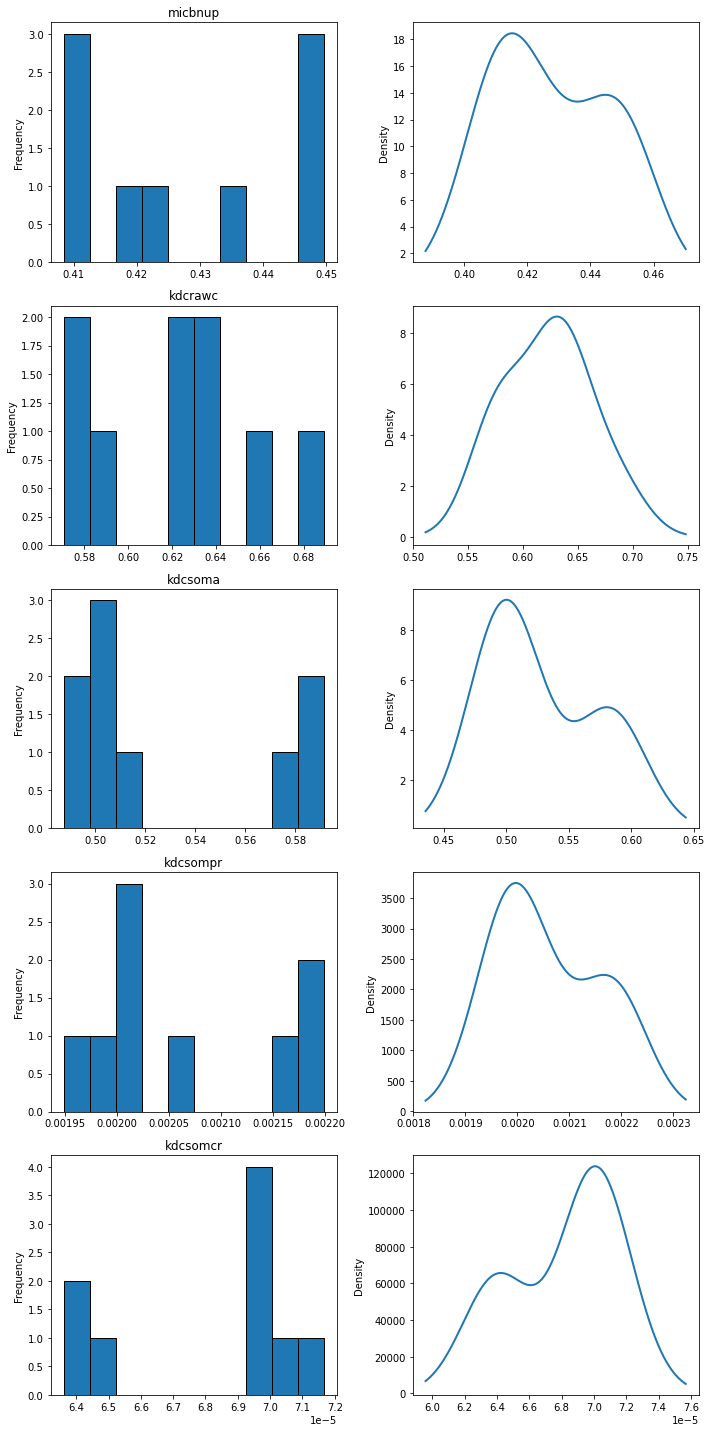

In [107]:
xparams, ymodel = ut.get_params(df_param,df_model,r2lim=0.9)
# if throws a 'is_first_col' error, do 'pip install --upgrade matplotlib'
ut.plot_hist_dist(xparams)

In [32]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
[nrows, ncols]=df_param.shape
score=[]
true_params=[0.4495,   # micbnup: parameter for soil microbial immobialization of N  .64 
             0.634,    # kdcrawc: raw-material (litter) C decompositin rates at reference condition   .654
             0.54,     # kdcsoma:   0.58
             0.002,    # kdcsompr:   
             0.00007]  # kdcsomcr:
rmse=[mean_squared_error(df_param.iloc[i], true_params) for i in range(nrows)]
rmse

df_rmse = pd.Series( rmse,  name = 'RMSE'  )
result = pd.concat([df_param, df_rmse], axis=1)
result

,micbnup,kdcrawc,kdcsoma,kdcsompr,kdcsomcr,RMSE
0,0.359654,0.760796,0.607767,0.001622,0.000084,0.005748
1,0.392246,0.540444,0.508834,0.001629,0.000068,0.002600
2,0.489474,0.751067,0.646229,0.001618,0.000083,0.005317
3,0.495547,0.635505,0.647033,0.001693,0.000066,0.002716
4,0.528507,0.537869,0.444790,0.001633,0.000066,0.004910
5,0.500889,0.639689,0.432204,0.001682,0.000066,0.002859
6,0.510467,0.640021,0.457620,0.001691,0.000066,0.002108
7,0.442265,0.508557,0.529330,0.001631,0.000067,0.003180
8,0.509532,0.617486,0.541531,0.001677,0.000066,0.000776
9,0.481666,0.718584,0.580089,0.001755,0.000066,0.001959


In [33]:
xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param,df_model)
xparams_MD1
rmetric='RMSE'
nelem=10
order=True
ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:nelem]

,CarbonShallow,CarbonDeep,CarbonMineralSum,AvailableNitrogenSum,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
5,608.499008,1418.548373,4958.589688,6.822821,0.999999,2.227857,0.015386,0.991239,0.000009,0.040262
8,608.644507,1417.199289,4957.869374,6.394271,0.999999,2.301288,0.033206,0.967371,0.000010,0.086895
6,608.353938,1415.492766,4958.814486,6.876120,0.999999,4.772612,0.013921,0.993195,0.000020,0.036430
3,608.075121,1418.457418,4960.892654,8.106103,0.999998,5.598279,0.029115,0.972842,0.000024,0.076190
4,609.604491,1405.590850,4947.272277,2.867218,0.999980,73.011569,0.382140,0.499831,0.000308,1.000000
1,609.389684,1410.939118,4932.388559,7.055476,0.999953,172.695824,0.008846,0.999594,0.000728,0.023159
9,607.256859,1406.359613,4982.346452,11.447897,0.999946,199.478153,0.097591,0.880664,0.000841,0.255381
7,609.548701,1387.974215,4975.284602,3.645329,0.999915,315.471562,0.251553,0.674168,0.001331,0.658274
2,584.040606,1325.483622,4020.799382,11.743201,0.906037,221703.853922,0.183933,0.204932,0.937897,1.054193
0,579.845907,1338.587975,3986.518932,19.266232,0.897226,237579.235365,0.245793,0.079853,1.005267,1.193428


In [34]:
rmetric='RMSE'
result.sort_values(by=[rmetric],ascending=order)[:nelem]

,micbnup,kdcrawc,kdcsoma,kdcsompr,kdcsomcr,RMSE
8,0.509532,0.617486,0.541531,0.001677,0.000066,0.000776
9,0.481666,0.718584,0.580089,0.001755,0.000066,0.001959
6,0.510467,0.640021,0.457620,0.001691,0.000066,0.002108
1,0.392246,0.540444,0.508834,0.001629,0.000068,0.002600
3,0.495547,0.635505,0.647033,0.001693,0.000066,0.002716
5,0.500889,0.639689,0.432204,0.001682,0.000066,0.002859
7,0.442265,0.508557,0.529330,0.001631,0.000067,0.003180
4,0.528507,0.537869,0.444790,0.001633,0.000066,0.004910
2,0.489474,0.751067,0.646229,0.001618,0.000083,0.005317
0,0.359654,0.760796,0.607767,0.001622,0.000084,0.005748


In [35]:
true_params=[0.4495,   # micbnup: parameter for soil microbial immobialization of N  .64 
             0.634,    # kdcrawc: raw-material (litter) C decompositin rates at reference condition   .654
             0.54,     # kdcsoma:   0.58
             0.002,    # kdcsompr:   
             0.00007] 